In [1]:
%%capture

import sys
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
sys.path.append("used_functions")
#import custom_functions


%load_ext autoreload
%autoreload 2

plt.style.use('ggplot')
## Change title size of a plot
mpl.rcParams['axes.titlesize']  = 22
## Change label size(x and y) of a plot
mpl.rcParams['axes.labelsize']  = 18
## Change xticks size of a plot
mpl.rcParams['xtick.labelsize'] = 16
## Change yticks size of a plot
mpl.rcParams['ytick.labelsize'] = 16

In [2]:
training_df   = pd.read_csv("training.csv")
validate_df   = pd.read_csv("validate.csv")
testing_df    = pd.read_csv("testing.csv")

In [3]:
print(training_df.dtypes)

ID                              int64
Case Number                    object
Date                           object
Block                          object
IUCR                           object
Primary Type                   object
Description                    object
Location Description           object
Arrest                           bool
Domestic                         bool
Beat                            int64
District                        int64
Ward                            int64
Community Area                  int64
Latitude                      float64
Longitude                     float64
Primary_Type_Codes              int64
Description_Codes               int64
Location_Desctiption_Codes      int64
Arrest_Codes                    int64
Domestic_Codes                  int64
Year                            int64
Month                           int64
Week                            int64
Hour                            int64
dtype: object


In [4]:
unique_counts = pd.DataFrame.from_records([(col, training_df[col].nunique()) for col in training_df.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
print(unique_counts)

                   Column_Name  Num_Unique
20              Domestic_Codes           2
19                Arrest_Codes           2
8                       Arrest           2
9                     Domestic           2
21                        Year          10
22                       Month          12
11                    District          23
24                        Hour          24
5                 Primary Type          33
16          Primary_Type_Codes          33
12                        Ward          50
23                        Week          53
13              Community Area          78
7         Location Description         155
18  Location_Desctiption_Codes         155
10                        Beat         303
6                  Description         346
17           Description_Codes         346
4                         IUCR         370
3                        Block       33803
15                   Longitude      431631
14                    Latitude      431817
2          

In [5]:
##Training Dataset pre-processing

training_df['Location Description'] = training_df['Location Description'].astype("category").cat.codes

training_df['Community Area']       = training_df['Community Area'].astype("category")

training_df['Beat']                 = training_df['Beat'].astype("category")

training_df['Ward']                 = training_df['Ward'].astype("category")

training_df['Description']          = training_df['Description'].astype("category").cat.codes

training_df['Domestic']             = training_df['Domestic'].astype("category").cat.codes

training_df['Arrest']               = training_df['Arrest'].astype("category").cat.codes

training_df['Primary Type']         = training_df['Primary Type'].astype("category").cat.codes

training_df['Year']                 = training_df['Year'].astype("category").cat.codes

training_df['Month']                = training_df['Month'].astype("category").cat.codes

training_df['Week']                 = training_df['Year'].astype("category").cat.codes

training_df['Hour']                 = training_df['Hour'].astype("category").cat.codes


##Validation Dataset pre-processing

validate_df['Location Description'] = validate_df['Location Description'].astype("category").cat.codes

validate_df['Community Area']       = validate_df['Community Area'].astype("category")

validate_df['Beat']                 = validate_df['Beat'].astype("category")

validate_df['Ward']                 = validate_df['Ward'].astype("category")

validate_df['Description']          = validate_df['Description'].astype("category").cat.codes

validate_df['Domestic']             = validate_df['Domestic'].astype("category").cat.codes

validate_df['Arrest']               = validate_df['Arrest'].astype("category").cat.codes

validate_df['Primary Type']         = validate_df['Primary Type'].astype("category").cat.codes

validate_df['Year']                 = validate_df['Year'].astype("category").cat.codes

validate_df['Month']                = validate_df['Month'].astype("category").cat.codes

validate_df['Week']                 = validate_df['Year'].astype("category").cat.codes

validate_df['Hour']                 = validate_df['Hour'].astype("category").cat.codes


##Testing Dataset pre-processing

testing_df['Location Description'] = testing_df['Location Description'].astype("category").cat.codes

testing_df['Community Area']       = testing_df['Community Area'].astype("category")

testing_df['Beat']                 = testing_df['Beat'].astype("category")

testing_df['Ward']                 = testing_df['Ward'].astype("category")

testing_df['Description']          = testing_df['Description'].astype("category").cat.codes

testing_df['Domestic']             = testing_df['Domestic'].astype("category").cat.codes

testing_df['Arrest']               = testing_df['Arrest'].astype("category").cat.codes

testing_df['Primary Type']         = testing_df['Primary Type'].astype("category").cat.codes

testing_df['Year']                 = testing_df['Year'].astype("category").cat.codes

testing_df['Month']                = testing_df['Month'].astype("category").cat.codes

testing_df['Week']                 = testing_df['Year'].astype("category").cat.codes

testing_df['Hour']                 = testing_df['Hour'].astype("category").cat.codes

## Making 'Arrest' as the label variable in all the three datasets

In [6]:
X_train = training_df.loc[:,['Primary Type','Description','Location Description', 
                             'Domestic', 'District', 'Ward', 
                             'Community Area', 'Latitude', 'Longitude',
                             'Year', 'Month', 'Week', 'Hour']]

y_train = training_df.loc[:,"Arrest"]

In [7]:
X_validate = validate_df.loc[:,['Primary Type','Description','Location Description',
                                'Domestic', 'District', 'Ward',
                                'Community Area', 'Latitude', 'Longitude',
                                'Year', 'Month', 'Week', 'Hour']]

y_validate = validate_df.loc[:,"Arrest"]

In [8]:
X_test = testing_df.loc[:,["Primary Type",'Description','Location Description',
                           'Domestic', 'District', 'Ward',
                           'Community Area', 'Latitude', 'Longitude',
                           'Year', 'Month', 'Week', 'Hour']]

y_test = testing_df.loc[:,"Arrest"]

In [9]:
##Logistic Regression Algorithm

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=23,solver='lbfgs')
lr.fit(X_train, y_train)

C:\Users\tarun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=23, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
y_predLR_train = lr.predict(X_train)
y_predLR_val   = lr.predict(X_validate)
y_predLR_test  = lr.predict(X_test)

In [11]:
print("Accuracy of Training Dataset:\t",   accuracy_score(y_predLR_train, y_train))
print("Accuracy of Validation Dataset:\t", accuracy_score(y_predLR_val,   y_validate))
print("Accuracy of Testing Dataset:\t",    accuracy_score(y_predLR_test,  y_test))

Accuracy of Training Dataset:	 0.7508784196922509
Accuracy of Validation Dataset:	 0.7495957767669514
Accuracy of Testing Dataset:	 0.7512060841414858


In [12]:
##Random Forest Classifier Algorithm 

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=7, random_state=23)
rf.fit(X_train, y_train)

C:\Users\tarun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=23, verbose=0,
                       warm_start=False)

In [13]:
y_predRF_train = rf.predict(X_train)
y_predRF_val   = rf.predict(X_validate)
y_predRF_test  = rf.predict(X_test)

In [14]:
#print("Random Forest Classifier\n")
print("Accuracy of Training Dataset:\t",   accuracy_score(y_predRF_train, y_train))
print("Accuracy of Validation Dataset:\t", accuracy_score(y_predRF_val,   y_validate))
print("Accuracy of Testing Dataset:\t",    accuracy_score(y_predRF_test,  y_test))

Accuracy of Training Dataset:	 0.8648073846944052
Accuracy of Validation Dataset:	 0.846205568361566
Accuracy of Testing Dataset:	 0.8376508921862601


In [15]:
##Naive Baye's Classifier Algorithm 

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [16]:
y_predNB_train = nb.predict(X_train)
y_predNB_val   = nb.predict(X_validate)
y_predNB_test  = nb.predict(X_test)

In [17]:
print("Accuracy of Training Dataset:\t",   accuracy_score(y_predNB_train, y_train))
print("Accuracy of Validation Dataset:\t", accuracy_score(y_predNB_val,   y_validate))
print("Accuracy of Testing Dataset:\t",    accuracy_score(y_predNB_test,  y_test))

Accuracy of Training Dataset:	 0.7689017609524703
Accuracy of Validation Dataset:	 0.7653047430614929
Accuracy of Testing Dataset:	 0.7663918597220564


In [18]:
##Neural Networks - MLP Classifier Algorithm

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=23,solver='lbfgs')
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=23, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [19]:
y_predNN_train = mlp.predict(X_train)
y_predNN_val   = mlp.predict(X_validate)
y_predNN_test  = mlp.predict(X_test)

In [20]:
print("Accuracy of Training Dataset:\t",   accuracy_score(y_predNN_train, y_train))
print("Accuracy of Validation Dataset:\t", accuracy_score(y_predNN_val,   y_validate))
print("Accuracy of Testing Dataset:\t",    accuracy_score(y_predNN_test,  y_test))

Accuracy of Training Dataset:	 0.8333889268708395
Accuracy of Validation Dataset:	 0.8244889933656477
Accuracy of Testing Dataset:	 0.8181850101472581


In [30]:
model  = ['Logistic Regression', 'Random Forest', "Naive Baye's", 'Neural Network']

trAcc  = [accuracy_score(y_predLR_train, y_train), accuracy_score(y_predRF_train, y_train),
       accuracy_score(y_predNB_train, y_train), accuracy_score(y_predNN_train, y_train)]

valAcc = [accuracy_score(y_predLR_val,   y_validate), accuracy_score(y_predRF_val,   y_validate),
       accuracy_score(y_predNB_val,   y_validate), accuracy_score(y_predNN_val,   y_validate)]

tesAcc = [accuracy_score(y_predLR_test,  y_test), accuracy_score(y_predRF_test,  y_test),
       accuracy_score(y_predNB_test,  y_test), accuracy_score(y_predNN_test,  y_test)]


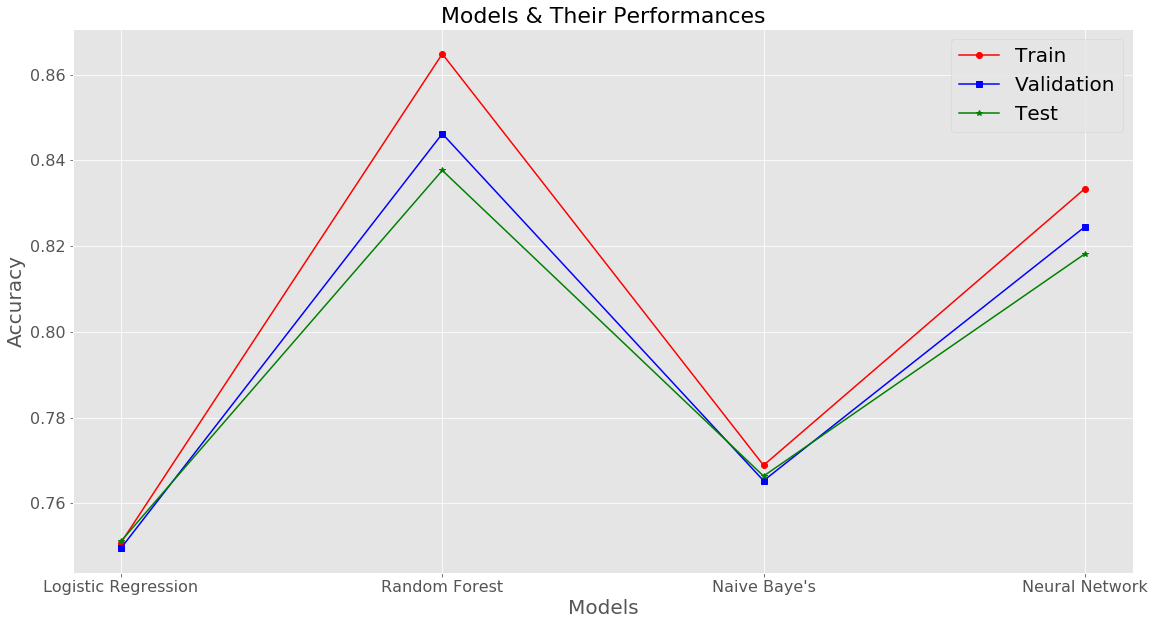

In [31]:
plt.figure(figsize = (19, 10))
plt.plot(model, trAcc, "o-", label = "Train", color = "red")
plt.plot(model, valAcc, "s-", label = "Validation", color = "blue")
plt.plot(model, tesAcc, "*-", label = "Test", color = "green")
plt.legend(fontsize=20)
plt.xlabel("Models", fontsize = 20)
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Models & Their Performances", fontsize = 22)
plt.show()